In [24]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# write the query to get the data from Google BigQuery
sql = """
SELECT
  *
FROM
  `bigquery-public-data.covid19_jhu_csse.confirmed_cases`
"""

In [4]:
# use the method read_gbq to load the data to pandas
df = pd.read_gbq(sql, project_id='data-science-personal',dialect='standard')

Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 259/259 [00:01<00:00, 223.65rows/s]


In [42]:
# define a new dataframe with the new cases in Portugal
new_cases_portugal = df[df['country_region'] == 'Portugal']

In [43]:
new_cases_portugal.head()

,province_state,country_region,latitude,longitude,location_geom,_1_22_20,_1_23_20,_1_24_20,_1_25_20,_1_26_20,...,_3_26_20,_3_27_20,_3_28_20,_3_29_20,_3_30_20,_3_31_20,_4_1_20,_4_2_20,_4_3_20,_4_4_20
86,None,Portugal,39.3999,-8.2245,POINT(-8.2245 39.3999),0,0,0,0,0,...,3544,4268,5170,5962,6408,7443,8251,9034,9886,10524


In [16]:
new_case_pt_transpose = new_cases_portugal.drop(labels=['province_state','country_region', 'latitude', 'longitude', 'location_geom'], axis=1).transpose()

In [46]:
new_case_pt_transpose.columns = ['new_cases']
new_case_pt_transpose['days'] = new_case_pt_transpose.index

SyntaxError: unexpected EOF while parsing (<ipython-input-46-af540d27cb31>, line 3)

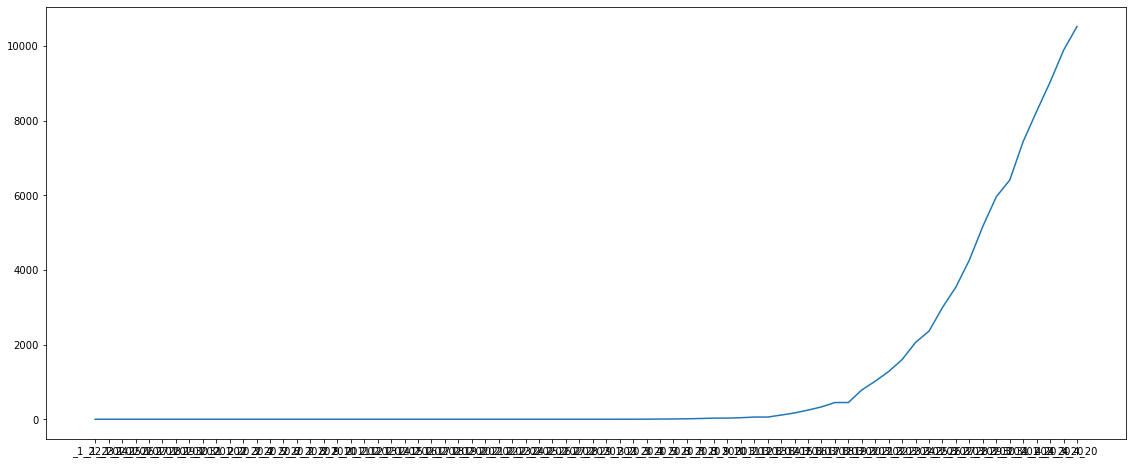

In [40]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_axes([0,0,1,1])

ax1.plot(new_case_pt_transpose['days'], new_case_pt_transpose['new_cases'])

#plt.plot(new_case_pt_transpose['days'], new_case_pt_transpose['new_cases'])
